# Übungsblatt 2: Informierte Suchverfahren

## Aufgabe: Suche mit negativen Pfadkosten

Nehmen Sie ein Suchproblem an, bei dem beliebig große negative Pfadkosten für einzelne Aktionen
auftreten können. Beantworten Sie die folgenden Fragen:

### 
Warum zwingt diese Möglichkeit Suchalgorithmen generell dazu, den gesamten Suchraum zu explorieren?

=== BEGIN MARK SCHEME ===

Jeder Pfad, unabhängig davon wie schlecht er erscheint, kann zu beliebig großen negativen Pfadkosten führen. Daher müssen alle möglichen Pfade exploriert werden um den besten (=geringste Kosten) zu finden.

=== END MARK SCHEME ===

### 

Wird die Situation durch die Einführung einer negativen Schranke $c$ verbessert, wenn gilt $g(x) > c$? Betrachten Sie hier sowohl Suchräume mit als auch ohne Schleifen.

=== BEGIN MARK SCHEME ===

Angenommen die größten negativen Pfadkosten seien $c$. Wenn wir zusätzlich auch die maximale Tiefe des Suchraumes kennen (z.B. bei einem Suchbaum), dann kann jeder Pfad der Länge $d$ maximal um $cd$ verbessert werden. Daher können alle Pfade, die um $cd$ schlechter sind als der beste Pfad verworfen werden. Für Suchräume mit Schleifen hilft diese Garantie nicht, da es möglich ist eine Schleife beliebig oft zu durchlaufen und dadurch die Pfadkosten immer weiter zu verringern.


=== END MARK SCHEME ===

### 

Reale Probleme mit negativen Kosten lassen sich einfach konstruieren. So können beispielsweise einzelne Routenabschnitte durch besonders schöne Szenerie die Kosten für Zeit und Kraftstoff ausgleichen. Beschreiben Sie im Kontext dieses Routenplanungsproblems warum menschliche Agenten keine Endlosschleifen ausführen und erweitern Sie den Zustandsraum dahingehend, dass auch künstliche Agenten dieses Verhalten zeigen.

=== BEGIN MARK SCHEME ===

Der Wert einer schönen Szenerie wird mit jedem Durchlauf geringer. Um dies auch für künstliche Agenten zu ermöglichen, muss der Zustandsraum um eine Liste aller bereits besuchten Zustände erweitert werden. Die negativen Pfadkosten werden in jedem Durchlauf mit der Anzahl der bereits erfolgten Besuche (+ obere Schranke) korrigiert und werden dadurch irgendwann nicht mehr durchlaufen.

=== END MARK SCHEME ===

## Aufgabe: Heuristiken

Gegeben sei ein stark vereinfachter $(n \times n)$-Parkplatz mit n geparkten Fahrzeugen in der untersten Reihe. Alle Fahrzeuge sollen von der untersten in die oberste Reihe bewegt werden, allerdings in umgekehrter Reihenfolge; das Fahrzeug in Position $(i, 1)$ soll also an Position $(n − i + 1, n)$ stehen.
In jedem Zeitschritt wird jedes Fahrzeug um 1 Feld nach links, rechts, oben oder unten bewegt, oder es bleibt am aktuellen Ort stehen. Ein stehendes Fahrzeug kann von einem benachbarten Fahrzeug übersprungen werden. Zwei Fahrzeuge können nicht auf demselben Feld stehen.

### 
Geben Sie die Größe des Zustandsraums als Funktion von n an.

=== BEGIN MARK SCHEME ===

**Exkurs: Kombinatorik**

Gesamtmenge (Urne) der Größe $n$. Stichprobe der Größe k.
Reihenfolge berücksichtigt. Ja: $(0,1) \neq (1,0)$. Nein: $(0,1) = (1,0)$. Wiederholung. Mit: Zurücklegen der Stichprobe. Sonst ohne.

1. Permutation
    - $k = n$
    - Reihenfolge berücksichtigt
2. Variation
    - $k < n$
    - Reihenfolge berücksichtigt
3. Kombination
    - $k < n$
    - Reihenfolge nicht berücksichtigt

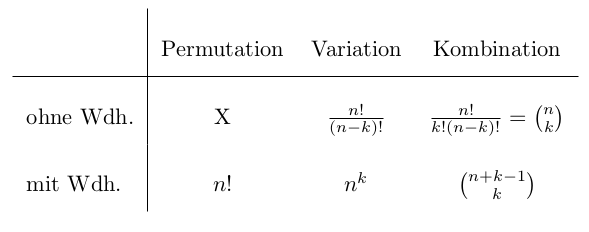

**Zurück zur Aufgabe:**

Ziehen der Felder **ohne** Wiederholung, **mit** Berücksichtigung der Reihenfolge: Variation ohne Wiederholung.

\begin{equation*}
    \frac{n^2!}{(n^2-n)!}
\end{equation*}

=== END MARK SCHEME ===

In [2]:
import math
n = 10
print(math.factorial(n**2)/math.factorial(n**2 - n))


6.281565095552947e+19


### 

Bestimmen Sie den Verzweigungsfaktor als Funktion von n.

=== BEGIN MARK SCHEME ===

\begin{equation*}
    5^n
\end{equation*}
Solange alle Aktionen jedes Fahrzeuges möglich sind (worst-case).

=== END MARK SCHEME ===

### 
Gegeben sei ein Fahrzeug i auf dem Parkplatz an Position $(x_i, y_i)$. Geben Sie eine nichttriviale zulässige Heuristik $h_i$ an, welche die Anzahl der nötigen Züge, um das Fahrzeug zu seiner Zielposition $(n−i+1, n)$ zu bewegen, abschätzt. Es seien keine weiteren Fahrzeuge auf dem Platzplatz.

=== BEGIN MARK SCHEME ===

- Manhattan-Distanz
- Manhattan-Distanz / 2

=== END MARK SCHEME ===

### 
Welche der folgenden Heuristiken sind zulässig, für das Problem alle n Fahrzeuge an ihre Zielposition
zu bewegen? Erklären Sie.

1. $\sum_{i=1}^n h_i$
2. $\max\{h_1, \ldots, h_n\}$
3. $\min\{h_1, \ldots, h_n\}$

=== BEGIN MARK SCHEME ===

1. Nein. Statt Summe den Mittelwert: ja
2. Erste Nein, Zweite Ja
3. ja

=== END MARK SCHEME ===

## Aufgabe: Informierte Suche im Labyrinth

Implementieren Sie die Suche im Labyrinth nun mittels informierten Suchalgorithmen. Als Heuristik verwenden Sie die Manhattan-Distanz zwischen der betrachteten Position und dem Ziel. Diese lässt sich wie folgt berechnen:

$$d(a,b) = \sum_i|a_i-b_i|$$

Als Pfadkosten können Sie konstante Kosten von 1 pro Feld annehmen.

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint
import enum
# Try to import the numba just-in-time compiler
# This is optional and will not result in an error but will speed up the maze generation significantly!
try:
    from numba import njit
except ImportError:
    # use a dummy wrapper instead
    # this will be significantly slower
    def njit(*args, **kwargs):
        def __wrapped__(function):
            return function
        return __wrapped__   

class MazeTiles(enum.IntEnum):
    EMPTY = 0  # value of an empty tile
    WALL = 5   # value of a wall tile
    START = 1  # value of the start tile. This is only used when writing the maze to an ASCII representation.
    END = 2    # value of the goal tile. This is only used when writing the maze to an ASCII representation.
    

class Maze(object):
    """
    Class representing a Maze. By default it is randomly generated.
    """
    MAZE_DTYPE = np.int8  # data type of the maze representation
       
    # color values for the plot
    START_COLOR = 'blue'
    END_COLOR = 'red'


    def __init__(self, shape, complexity=0.75, density=0.50, seed=None, generate=True):
        """
        Initialize a maze with the given shape.
        Optionally, a maze is generated randomly using the randomized prim's algorithm
        (https://en.wikipedia.org/wiki/Maze_generation_algorithm).
        :param shape: tuple(x,y)
            The shape of the maze to create.
            Even x and y values will be increased by one so the resulting shape is always odd.
        :param complexity: float
            The complexity parameter when randomly generated (between 0.0 and 1.0).
        :param density: float
            The density of the randomly generated maze (between 0.0 and 1.0). Low values will
            result in more empty space between the walls of the maze.
        :param seed: int
            Seed to use for the random generation. By default it is initialized with the system entropy
        :param generate: bool
            Generate a random maze.
        """

        # Only odd shapes allowed
        self.shape = ((shape[0] // 2) * 2 + 1, (shape[1] // 2) * 2 + 1)
        self.board = np.zeros(self.shape, dtype=self.MAZE_DTYPE)
        # Fill borders
        self.board[0, :] = self.board[-1, :] = self.board[:, 0] = self.board[:, -1] = MazeTiles.WALL
        self.start = (1,1)
        self.end = (self.shape[0]-2, self.shape[1]-2)
        if generate:
            self._create(self.shape, complexity, density, seed)

    def to_ascii(self):
        """
        Convert the maze into an ascii representation that can be printed on the command line or stored in a file.
        :return: str
            ASCII representation of the maze.
        """
        rep = ''

        mapping = {MazeTiles.WALL: 'X',
                   MazeTiles.EMPTY: ' ',
                   MazeTiles.START: 'S',
                   MazeTiles.END: 'G'}
        board_copy = self.board.copy()
        board_copy[self.start] = MazeTiles.START
        board_copy[self.end] = MazeTiles.END
        for i in range(self.nrows):
            for j in range(self.ncolumns):
                try:
                    rep += mapping[board_copy[i, j]]
                except KeyError:
                    rep += ' '
            rep += '\n'
        return rep

    def plot(self, fig=None):
        """
        Plot the maze. This requires the matplotlib library.
        :return: matplotlib.Figure
            The figure of the plot. By default this can be ignored safely
        """
        import matplotlib.pyplot as plt
        if fig is None:
            fig = plt.figure(figsize=(10, 5))
        p = plt.imshow(self.board, cmap=plt.cm.binary, interpolation='nearest', zorder=-1)
        plt.scatter(self.start[1], self.start[0], c=self.START_COLOR, zorder=5)
        plt.scatter(self.end[1], self.end[0], c=self.END_COLOR, zorder=5)
        plt.gca().set_xticks(np.arange(-.5, self.shape[1], 1), minor=True)
        plt.gca().set_xticks(np.arange(self.shape[1], 5))
        plt.gca().set_yticks(np.arange(-.5, self.shape[0]+0.5, 1), minor=True)
        plt.gca().set_yticks(np.arange(self.shape[0], 5))
        plt.grid(which='minor')
        return fig

    def write_to_file(self, filename):
        """
        Write the maze into the given file in ASCII representation.
        :param filename: str
            The file to write
        """
        f = open(filename, 'w')
        f.write(self.to_ascii())
        f.close()

    @property
    def nrows(self):
        """
        Property to return the number of rows of the maze.
        :return: int
            number of rows.
        """
        return self.shape[0]

    @property
    def ncolumns(self):
        """
        Property to return the number of columns of the maze.
        :return: int
            number of columns.
        """
        return self.shape[1]

    def is_wall(self, x, y):
        """
        Return True if the given coordinate is a wall tile
        :param x: int
            the x coordinate
        :param y: int
            the y coordinate
        :return: bool
            True if a wall tile, False otherwise
        """
        return self.board[x, y] == MazeTiles.WALL

    def is_empty(self, x, y):
        """
        Return True if the given coordinate is an empty tile
        :param x: int
            the x coordinate
        :param y: int
            the y coordinate
        :return: bool
            True if a empty tile, False otherwise
        """
        return self.board[x, y] == MazeTiles.EMPTY

    def _get_dead_ends(self):
        """
        Internal function. DO NOT USE
        """
        from scipy.signal import convolve2d
        board = self.board
        kernel = np.ones((3,3), dtype=self.MAZE_DTYPE)
        kernel[1,1] = 0

        indices = np.where(np.logical_and(board == 0, convolve2d(board, kernel, fillvalue=1, mode='same') == 7))
        return indices

    def set_start_end_random(self):
        """
        Set the start and end of the maze to random locations.
        Both coordinates will always be placed in dead ends of the maze.
        :return: tuple(start, end)
            The start and end location
        """
        dead_ends = self._get_dead_ends()
        indices = np.arange(0, dead_ends[0].shape[0])
        indices = np.random.choice(indices, 2)
        self.start = (dead_ends[0][indices[0]], dead_ends[1][indices[0]])
        self.end = (dead_ends[0][indices[1]], dead_ends[1][indices[1]])

        return self.start, self.end

    def set_start_end(self, start, end):
        """
        Set the start and end of the maze to specifiy values.
        Note, that this does not take the existing walls into account.
        :param start: tuple(x,y)
            The start coordinate
        :param end: tuple(x,y)
            The end coordinate
        """
        self.start = tuple(start)
        self.end = tuple(end)

    def get_neighbors(self, coord, visited=set()):
        """
        Get all neighbors of a given coordinate. The order will be always left, right, up, down.
        :param coord: tuple(x,y)
            The coordinate as tuple of x and y
        :param visited: set 
            Optional visited set to exclude neighbors that have already been visited
        :return: list(tuple)
            List of all neighbors as (x,y) tuples
        """
        neighbors = [(coord[0] - 1, coord[1]), (coord[0] + 1, coord[1]), (coord[0], coord[1] - 1),
                    (coord[0], coord[1] + 1)]
        return [c for c in neighbors if self.board[c[0], c[1]] != MazeTiles.WALL and c not in visited]

    def get_neighbors_iter(self, coord, visited=set()):
        c = (coord[0], coord[1] + 1)
        if self.board[c[0], c[1]] != MazeTiles.WALL and c not in visited:
            yield c
        c = (coord[0], coord[1] - 1)
        if self.board[c[0], c[1]] != MazeTiles.WALL and c not in visited:
            yield c
        c = (coord[0] + 1, coord[1])
        if self.board[c[0], c[1]] != MazeTiles.WALL and c not in visited:
            yield c
        c = (coord[0] - 1, coord[1])
        if self.board[c[0], c[1]] != MazeTiles.WALL and c not in visited:
            yield c

    @classmethod
    def load_from_file(cls, filename):
        """
        Load a new maze from a file.
        :param filename: str
            The file to load
        :return: Maze
            New maze loaded from file
        """
        with open(filename, 'r') as f:
            content = f.readlines()

        # remove whitespace characters like `\n` at the end of each line
        content = [x.strip() for x in content]

        inverse_mapping = {'X': MazeTiles.WALL,
                           ' ': MazeTiles.EMPTY}
        xss = []
        start = None
        end = None
        for i, line in enumerate(content):
            xs = []
            for j, c in enumerate(line):
                try:
                    xs.append(inverse_mapping[c])
                except KeyError as e:
                    xs.append(MazeTiles.EMPTY)
                    if c == 'S':
                        start = (i, j)
                    elif c == 'G':
                        end = (i, j)
                    else:
                        raise e

            xss.append(xs)

        if (start is None) ^ (end is None):
            raise ArithmeticError("Either start or end not defined")

        maze = Maze((len(xss), len(xss[0])), generate=False)
        if start is not None:
            maze.set_start_end(start, end)
        for xs in xss:
            assert len(xs) == maze.ncolumns

        maze.board = np.asarray(xss)
        return maze

    def _create(self, shape, complexity=0.75, density=0.50, seed=None):
        """
        Build a maze using given complexity and density. INTERNAL FUNCTION, DO NOT USE!
        For parameters see the constructor.
        """
        if seed is not None:
            np.random.seed(seed)

        # Only odd shapes
        shape = ((shape[0] // 2) * 2 + 1, (shape[1] // 2) * 2 + 1)

        # Adjust complexity and density relatively to maze size
        n_complexity = int(complexity * (shape[0] + shape[1]))
        n_density = int(density * (shape[0] * shape[1]))

        # reinit actual maze
        self.board = np.zeros(shape, dtype=self.MAZE_DTYPE)
        Z = self.board

        # Fill borders
        Z[0, :] = Z[-1, :] = Z[:, 0] = Z[:, -1] = MazeTiles.WALL

        # Islands starting point with a bias in favor of border
        P = np.random.normal(0, 0.5, (n_density, 2))
        P = 0.5 - np.maximum(-0.5, np.minimum(P, +0.5))
        P = (P * [shape[1], shape[0]]).astype(int)
        P = 2 * (P // 2)

        WALL = MazeTiles.WALL
        EMPTY = MazeTiles.EMPTY

        @njit()
        def create_islands(Z, P,  n_density, n_complexity):
            if seed is not None:

                np.random.seed(seed)
            # Create islands
            for i in range(n_density):

                # Test for early stop: if all starting point are busy, this means we
                # won't be able to connect any island, so we stop.
                T = Z[2:-2:2, 2:-2:2]
                if T.sum() == T.size:
                    break

                x, y = P[i]
                Z[y, x] = WALL
                for j in range(n_complexity):
                    neighbours = []
                    if x > 1:
                        neighbours.append([(y, x - 1), (y, x - 2)])
                    if x < shape[1] - 2:
                        neighbours.append([(y, x + 1), (y, x + 2)])
                    if y > 1:
                        neighbours.append([(y - 1, x), (y - 2, x)])
                    if y < shape[0] - 2:
                        neighbours.append([(y + 1, x), (y + 2, x)])
                    if len(neighbours):
                        choice = np.random.randint(len(neighbours))
                        next_1, next_2 = neighbours[choice]
                        if Z[next_2] == EMPTY:
                            Z[next_1] = Z[next_2] = WALL
                            y, x = next_2
                    else:
                        break

        create_islands(Z, P, n_density, n_complexity)
        return Z

<IPython.core.display.Javascript object>


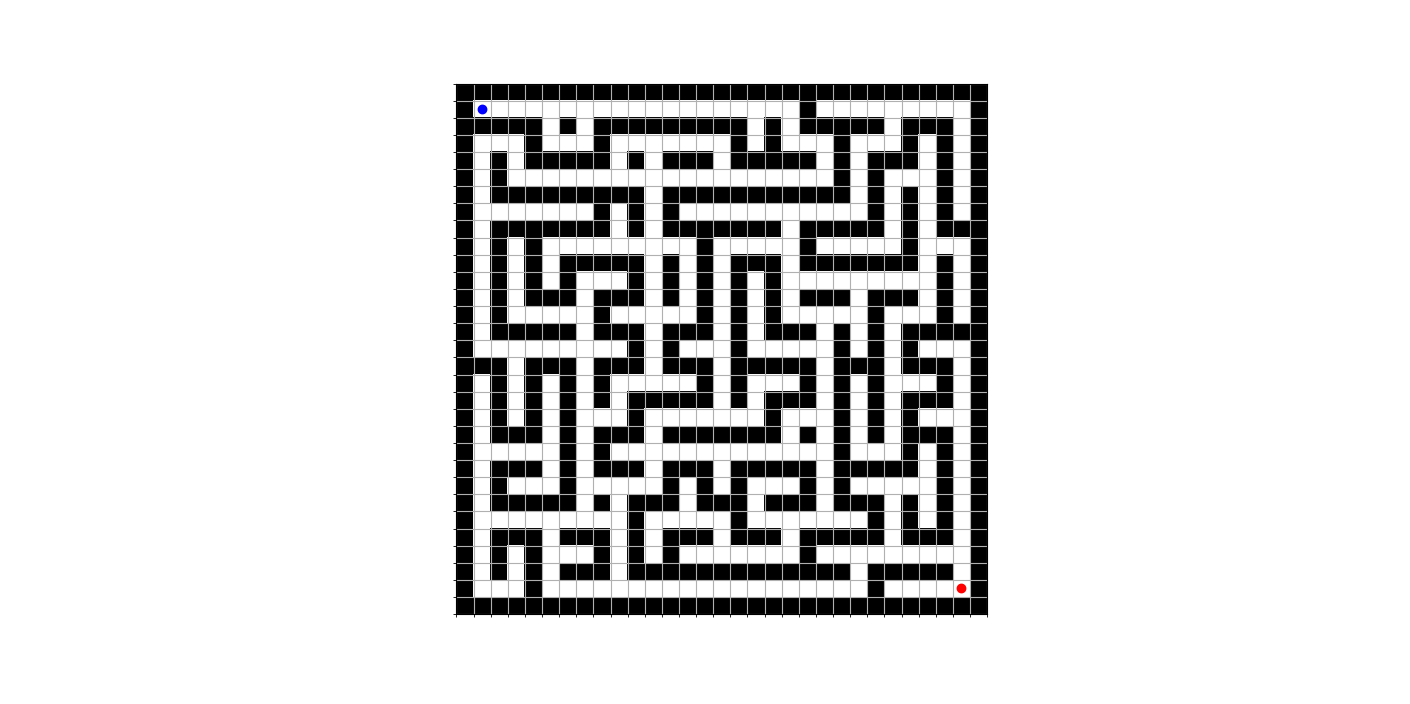

In [8]:
m = Maze((30,30))
fig = m.plot()
plt.show()

### 

Implementieren Sie den Algorithmus der Bestensuche für das gegebene Problem. Ermitteln Sie für die gegebenen Beispiele erneut:

- Laufzeit
- Anzahl der expandierten Knoten
- Maximale Tiefe des Suchbaums
- Maximale Größe der Suchfront
- Länge der gefundenen Lösung

Stellen Sie den ermittelten Pfad sowie alle vom Algorithmus besuchten Felder des Labyrinths grafisch
dar.

In [9]:
def manhattan_dist(a,b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

In [10]:
def best_first_search(maze, start, goal, plot=False):
    ### BEGIN SOLUTION
    
    if plot:
        # prepare the plot
        plt.ion()
        fig = maze.plot()
        fig.gca().set_title("Best search")
        path_plot = fig.gca().scatter([], [], c='lightcoral', zorder=2, alpha=0.8)
        visited_plot = fig.gca().scatter([], [], c='grey', zorder=1, alpha=0.8)

    # define a heuristic function
    def h(a):
        return manhattan_dist(a, goal)

    visited = set()
    max_depth = 0
    max_frontier = 0

    frontier = [([start], start)]

    step_num = 0
    while frontier:
        frontier = sorted(frontier, key=lambda node: -h(node[1]))
        path, current = frontier.pop()  # pop the vertex with smallest h
        if current == goal:
            if plot:
                plt.ioff()
            # we are done
            return path, (visited, max_depth, max_frontier)
        elif current not in visited:
            # expand node
            neighbors = maze.get_neighbors(current, visited)
            for neighbour in neighbors:
                p = list(path)
                p.append(neighbour)
                frontier.append((p, neighbour))
            visited.add(current)

        if len(frontier) > max_frontier:
                max_frontier = len(frontier)
        if len(path) > max_depth:
            max_depth = len(path)

        if plot:
            input() # wait for keypress
            path_plot.remove()
            visited_plot.remove()

            p = np.array(path).T
            v = np.array(list(visited)).T

            print("Current Step:", step_num)
            print('\tsmallest h: %f' % h(current))
            print("\tPath length (depth):", len(path))
            print("\tNodes in Frontier:", [q[1] for q in frontier])
            print("\tCurrent frontier size:", len(frontier))
            print("\tMax Frontier size:", max_frontier)
            print("\tMax depth:", max_depth)

            path_plot = fig.gca().scatter(p[1], p[0], c='lightcoral', zorder=2, alpha=0.8)
            visited_plot = fig.gca().scatter(v[1], v[0], c='grey', zorder=1, alpha=0.8)
            fig.canvas.draw()

        step_num += 1
    
    return None, (visited, max_depth, max_frontier)
    ### END SOLUTION

### 
Erweitern Sie den Algorithmus aus Aufgabenteil a) nun zu einer vollständigen A*-Suche. Vergleichen Sie die erhaltenen Werte mit denen der Bestensuche sowie den uninformierten Verfahren aus Teil 1.

In [11]:
def astar(maze, start, goal, plot=False):
    ### BEGIN SOLUTION
    
    if plot:
        # prepare the plot
        plt.ion()
        fig = maze.plot()
        fig.gca().set_title("Best search")
        path_plot = fig.gca().scatter([], [], c='lightcoral', zorder=2, alpha=0.8)
        visited_plot = fig.gca().scatter([], [], c='grey', zorder=1, alpha=0.8)

    # define a heuristic function
    def h(a):
        return manhattan_dist(a, goal)

    def g(path):
        return len(path)-1

    visited = set()
    max_depth = 0
    max_frontier = 0

    frontier = [([start], start)]

    step_num = 0
    while frontier:
        frontier = sorted(frontier, key=lambda node: -(h(node[1]) + g(node[0]) )  )
        path, current = frontier.pop()  # pop the vertex with smallest h


        if current == goal:
            if plot:
                plt.ioff()
            # we are done
            return path, (visited, max_depth, max_frontier)
        elif current not in visited:
            # expand node
            neighbors = maze.get_neighbors(current, visited)
            for neighbour in neighbors:
                p = list(path)
                p.append(neighbour)
                frontier.append((p, neighbour))
            visited.add(current)

        if len(frontier) > max_frontier:
                max_frontier = len(frontier)
        if len(path) > max_depth:
            max_depth = len(path)

        if plot:
            input() # wait for keypress
            path_plot.remove()
            visited_plot.remove()

            p = np.array(path).T
            v = np.array(list(visited)).T

            print("Current Step:", step_num)
            print('\tsmallest h: %f' % h(current))
            print("\tPath length (depth):", len(path))
            print("\tNodes in Frontier:", [q[1] for q in frontier])
            print("\tCurrent frontier size:", len(frontier))
            print("\tMax Frontier size:", max_frontier)
            print("\tMax depth:", max_depth)

            path_plot = fig.gca().scatter(p[1], p[0], c='lightcoral', zorder=2, alpha=0.8)
            visited_plot = fig.gca().scatter(v[1], v[0], c='grey', zorder=1, alpha=0.8)
            fig.canvas.draw()

        step_num += 1

    return None, (visited, max_depth, max_frontier)
    ### END SOLUTION

<IPython.core.display.Javascript object>


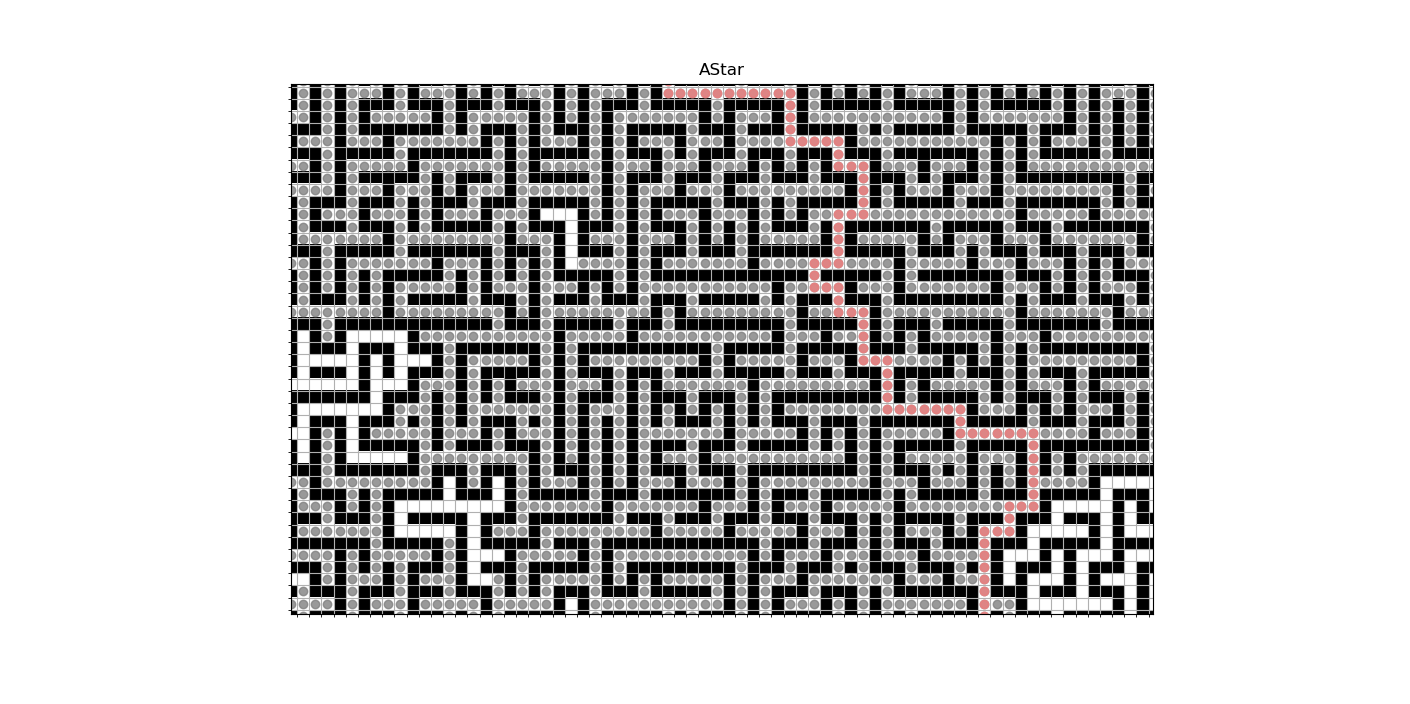

AStar: 
num expanded: 10708
maximum depth: 552
maximum frontier size: 134
path length: 553


In [15]:
### BEGIN SOLUTION
%matplotlib notebook
plot = False
m = Maze.load_from_file("examples/labyrinth_200x200.maze")


#path, stats = best_first_search(m, m.start, m.end, plot=plot)#

#fig_bfs = m.plot()
#fig_bfs.gca().set_title("Best first")

#if len(path) > 0:
#    path = np.array(path).T
#    path_plot = fig_bfs.gca().scatter(path[1], path[0], c='lightcoral', zorder=2, alpha=0.8)
#if len(stats) > 0:
#    visited = np.array(list(stats[0])).T

#    print("Best first: \nnum expanded: {}\nmaximum depth: {}\nmaximum frontier size: {}\npath length: {}".format(len(visited[0]), stats[1], stats[2], len(path[0])))
#    visited_plot = fig_bfs.gca().scatter(visited[1], visited[0], c='grey', zorder=1, alpha=0.8)
    
path, stats = astar(m, m.start, m.end, plot=plot)

fig_dfs = m.plot()
fig_dfs.gca().set_title("AStar")

if len(path) > 0:
    path = np.array(path).T
    fig_dfs.gca().scatter(path[1], path[0], c='lightcoral', zorder=2, alpha=0.8)
if len(stats) > 0:
    visited = np.array(list(stats[0])).T
    print("AStar: \nnum expanded: {}\nmaximum depth: {}\nmaximum frontier size: {}\npath length: {}".format(len(visited[0]), stats[1], stats[2], len(path[0])))
    fig_dfs.gca().scatter(visited[1], visited[0], c='grey', zorder=1, alpha=0.8)

plt.show()
### END SOLUTION

## A*-Routenplanung
In dieser Aufgabe werden Sie Ihren A*-Algorithmus auf den Daten des [OpenStreetMap-Projektes](https://www.openstreetmap.de) anwenden. Dazu werden wir das Python-Paket `osmnx` verwenden, welches Sie mit den  Aufrufen

```bash
conda config --prepend channels conda-forge
conda config --set channel_priority strict
conda install osmnx
```

in Ihrer Anaconda-Umgebnung installieren können. Das Paket stellt Funktionen zur Verfügung um die Daten von OpenStreetMap als Graph herunterzuladen und auf ihnen zu arbeiten. Die Dokumentation finden Sie [hier](https://osmnx.readthedocs.io/en/stable/). 
Für die unterliegende Graphenrepräsentation wird dabei das Paket `networkx` verwendet dessen Dokumentation Sie [hier](https://networkx.github.io) finden. Nutzen Sie die Dokumentationen um sich mit beiden Paketen vertraut zu machen. 

Sie werden primär die Straßennetze von `osmnx` nutzen. Im Folgenden finden Sie eine Vorlage für die Generierung und Nutzung eines solchen Netzes. Bei der Ausführung wird ein Straßennetz der Stadt Osnabrück geladen und eine einfache Routenplanung mit dem Dijkstra-Algorithmus durchgeführt.

*Hinweis*: Das Laden und Erzeugen der Straßennetze kann, abhängig von der Größe des gewünschten Gebietes, große Mengen an Arbeitsspeicher und Zeit beanspruchen. Daher ist im Ordner `osm_data` bereits das Straßennetz der Umgebung von Osnabrück bereitgestellt.

In [19]:
import matplotlib
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

def node_distance(graph, node1, node2):
    """
    Return the distance between the two graph nodes in meters.
    :param graph: networkx.Graph 
        The graph to look up the nodes
    :param node1: int
        The node id of the first node
    :param node2: int
        The node id of the second node
    :return: float
        Distance between the two node in meters
    """
    return ox.distance.great_circle_vec(graph.nodes[node1]['x'], 
                                 graph.nodes[node1]['y'],
                                 graph.nodes[node2]['x'],
                                 graph.nodes[node1]['y'])

In [32]:
# configure osmnx to cache the queries and log what it does (lots of text!)
ox.config(use_cache=True, 
          log_console=True)

# use data from file?
load_from_file = False

# positions of some locations
wachsbleiche = (52.2852171, 8.0365810704887)
goal = (52.272235, 8.060066)

# load some data
if load_from_file:
    try:
        G = ox.load_graphml('osnabrueck.graphml', folder='osm_data')
    except FileNotFoundError as e:
        raise FileNotFoundError("Graphml file 'osnabrueck.graphml' not found")
else:
    # fetch it from the osm servers
    G = ox.graph_from_point(wachsbleiche, dist=6000, network_type='drive', simplify=True)
    
wachsbleiche_node = ox.get_nearest_node(G, wachsbleiche)
goal_node = ox.get_nearest_node(G, goal)


# print the node data for the start
print("start node data:", G.nodes[wachsbleiche_node])

# print the distance between start and goal
print("distance between start and goal:", node_distance(G, wachsbleiche_node, goal_node))

# print the edge data for all edges at the starting node
print("edges around the start:")
for s, e, data in G.edges(wachsbleiche_node, data=True):
    print("\t", data)
    

start node data: {'y': 52.2847633, 'x': 8.0367854, 'osmid': 56330710, 'highway': 'traffic_signals'}
distance between start and goal: 2548.179897148757
edges around the start:
	 {'osmid': 7750344, 'name': 'Wachsbleiche', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 179.276, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c5677c490>}
	 {'osmid': 7750349, 'name': 'Stüvestraße', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 377.30199999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c5677c610>}
	 {'osmid': [196541664, 39699116, 196006717, 196006716], 'name': 'Wachsbleiche', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 179.38500000000002, 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c5677c760>}
	 {'osmid': 210720034, 'lanes': '4', 'name': 'Pagenstecherstraße', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 2

In [21]:
# use the notebook mode
%matplotlib notebook
# get a route (dijkstra; not the best!!!)
route = nx.shortest_path(G, wachsbleiche_node, goal_node)

if route:
    fig, ax = ox.plot_graph_route(G, route, figsize=(8, 8), show=False, close=False, node_color='#66ccff')
else:
    # plot just the graph
    fig, ax = ox.plot_graph(G, figsize=(8, 8), show=False, close=False, annotate=False)
    
# plot start and end positions of the route (reverse, because the coordinates are returned in the wrong order for matplotlib!)
ax.scatter(*reversed(wachsbleiche), c='r', s=15, zorder=3)
ax.scatter(*reversed(goal), c='g', s=15, zorder=3)

plt.show()


<IPython.core.display.Javascript object>

In [22]:
# print route information
print("route nodes:")
for i in range(len(route)-1):
    print("\t", G.get_edge_data(route[i], route[i+1]))

route nodes:
	 {0: {'osmid': 7750349, 'name': 'Stüvestraße', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 377.30199999999996, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c43b2ed60>}}
	 {0: {'osmid': 7750349, 'name': 'Stüvestraße', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 158.091, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c411fb3a0>}}
	 {0: {'osmid': [35940490, 371536580, 325790124, 35940436], 'ref': 'B 68', 'name': 'Hasetorwall', 'highway': 'primary', 'maxspeed': '50', 'oneway': False, 'length': 92.66699999999999, 'lanes': '4', 'bridge': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c43afb400>}}
	 {0: {'osmid': 203655594, 'oneway': True, 'lanes': '2', 'ref': 'B 68', 'name': 'Hasetorwall', 'highway': 'primary', 'maxspeed': '50', 'length': 49.336, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f9c4123fe50>}}
	 {0: {'osmid': 43176606, 'onewa

### 
Implementieren Sie einen A*-Algorithmus zur Routenplanung zwischen zwei Adressen in Ihrem Straßennetz. Als Heuristik verwenden Sie die (euklidische) Luftliniendistanz zwischen dem betrachteten Knoten und dem Ziel. Nehmen Sie zunächst die Länge der ausgewählten Kante im Graphen als Pfadkosten an. Die Länge finden Sie in den Metadaten der entsprechenden Kante.

*Hinweis*: Das Paket `networkx` stellt bereits eine Grundimplementation des A*-Algorithmus bereit. Sie können diese verwenden um die Funktionalität Ihrer eigenen Implementation zu verifizieren.

In [37]:
### BEGIN SOLUTION
def route_length(graph, route):
    length = 0
    for i in range(1, len(route)):
        ed = graph.get_edge_data(route[i-1], route[i])
        try:
            l = ed[0]['length']
        except KeyError:
            l = ed['length']
        length += l

    return length

class AstarSearch(object):
    def __init__(self, graph):
        self.graph = graph
        
    def _compute_cost(self, node, nbr):
        nbr_cost = []
        for nb in self.graph[node][nbr].values():
            length = nb['length']
            nbr_cost.append(length)
        return min(nbr_cost)
    


    def search(self, start, end):
        open_list = []
        closed_dict = dict()
        graph = self.graph
        
        open_list.append((start, 0, node_distance(graph, start, end)))
        graph.nodes[start]['parent'] = None
        #print("starting at", start)
        while open_list:
            current_node, node_cost, total_cost = open_list.pop(0)
            # closed_list.add(current_node)
            closed_dict[current_node] = (node_cost, total_cost)
            #print("current node", current_node, node_cost)
            if current_node == end:
                path = []
                current = current_node
                while current is not None:
                    path.append(current)
                    current = graph.nodes[current]['parent']
                return path[::-1] # reversed path

            # compute all neighbors

            for nbr in graph[current_node]:
                node_to_neighbor_cost = self._compute_cost(current_node, nbr)
                g = node_cost + node_to_neighbor_cost
                # heuristic cost
                h = node_distance(graph, nbr, end)
                # total cost
                f = g+h

                # skip neighbor that was already processed
                # and thats total_cost is smaller than the current neighbors cost
                if nbr in closed_dict and f >= closed_dict[nbr][1]:
                    continue

                # search for neighbors to be in open_list
                # continue if neighbor was found in open_list that has a better cost
                # update neighbor in open list if current has better cost
                dup_nodes = [(i,x) for (i, x) in enumerate(open_list) if nbr == x[0]]

                if len(dup_nodes) > 0:

                    dup_node_id = dup_nodes[0][0]
                    dup_node = dup_nodes[0][1]

                    if dup_node[2] < f:
                        continue
                    else:
                        del open_list[dup_node_id]

                graph.nodes[nbr]['parent'] = current_node
                open_list.append((nbr, g, f))

            open_list.sort(key=lambda elem: elem[2])

        return None
### END SOLUTION

<IPython.core.display.Javascript object>


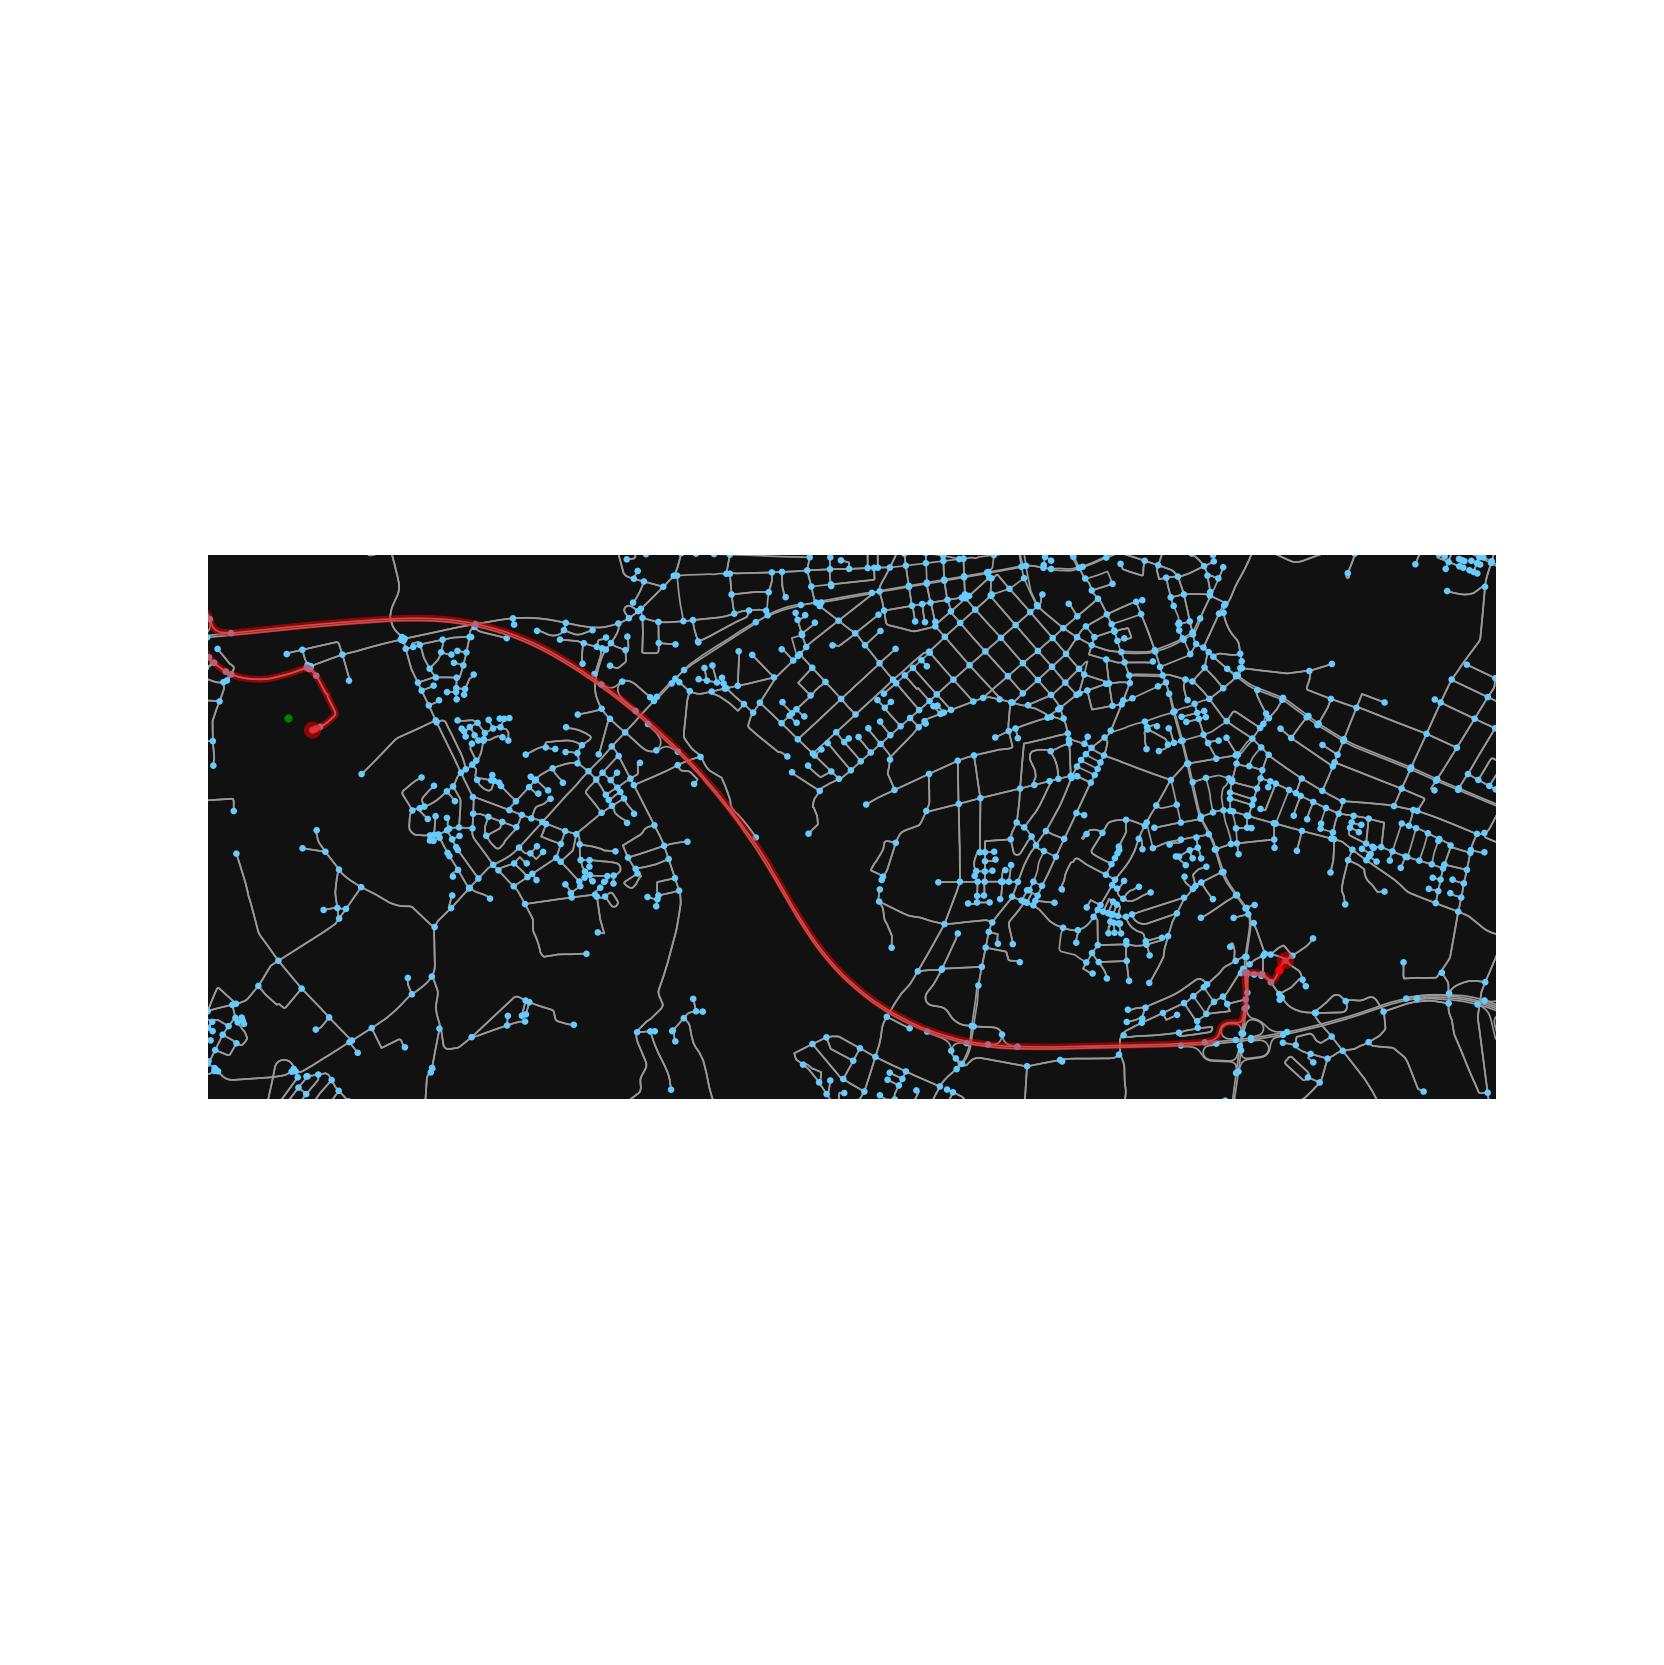

In [43]:
%matplotlib notebook
start = ox.geocoder.geocode('Klaus-Strick-Weg 10, 49082 Osnabrück')
goal = ox.geocoder.geocode('Rheiner Landstraße 215, Osnabrück')
start_node = ox.get_nearest_node(G, start)
goal_node = ox.get_nearest_node(G, goal)

#searcher = AstarSearch(G)
searcher = AstarSearchSpeed(G)

route = searcher.search(start_node, goal_node)

if route:
    fig, ax = ox.plot_graph_route(G, route, figsize=(8, 8), show=False, close=False, node_color='#66ccff')
else:
    # plot just the graph
    fig, ax = ox.plot_graph(G, figsize=(8, 8), show=False, close=False, annotate=False)
    
# plot start and end positions of the route (reverse, because the coordinates are returned in the wrong order for matplotlib!)
ax.scatter(*reversed(start), c='r', s=15, zorder=3)
ax.scatter(*reversed(goal), c='g', s=15, zorder=3)

plt.show()

### 
Erweitern Sie Ihren Algorithmus um weitere Informationen über die befahrenen Wege zu nutzen. Möglichkeiten sind hier beispielsweise die Bevorzugung möglichst schneller Wege oder die Bevorzugung bestimmter Straßentypen. Vergleichen Sie die Ergebnisse mit dem vorherigen Aufgabenteil.

In [42]:
### BEGIN SOLUTION
import re
class AstarSearchSpeed(AstarSearch):
    def _compute_cost(self, node, nbr):
        number_re = re.compile("^[^\d]*(\d+)")
        nbr_cost = []
        for nb in self.graph[node][nbr].values():
            length = nb['length']
            maxspeed = nb.get('maxspeed', '30')
            if isinstance(maxspeed, list):
                maxspeed = min([int(number_re.search(x).groups()[0]) for x in maxspeed])
            else:
                try:
                    maxspeed = int(number_re.search(maxspeed).groups()[0])
                except:
                    maxspeed = 5
            nbr_cost.append(length * max((130 / maxspeed), 1.0)) # punish slower routes
        return min(nbr_cost)
### END SOLUTION